# SuperStore veri analizi

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

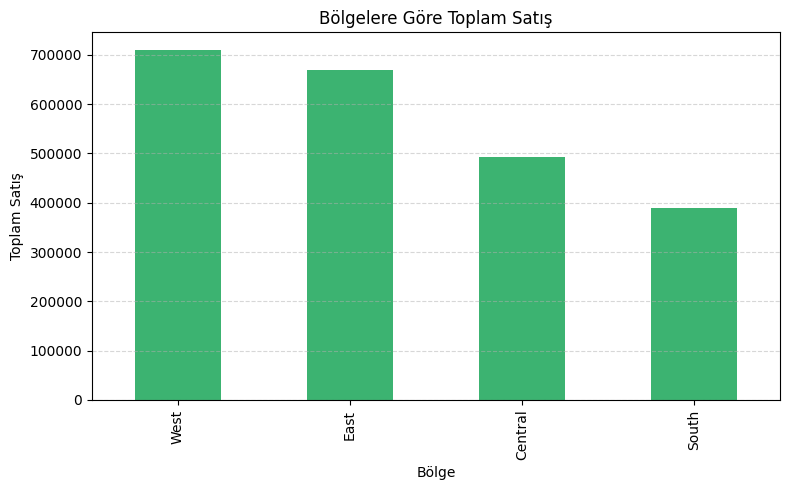

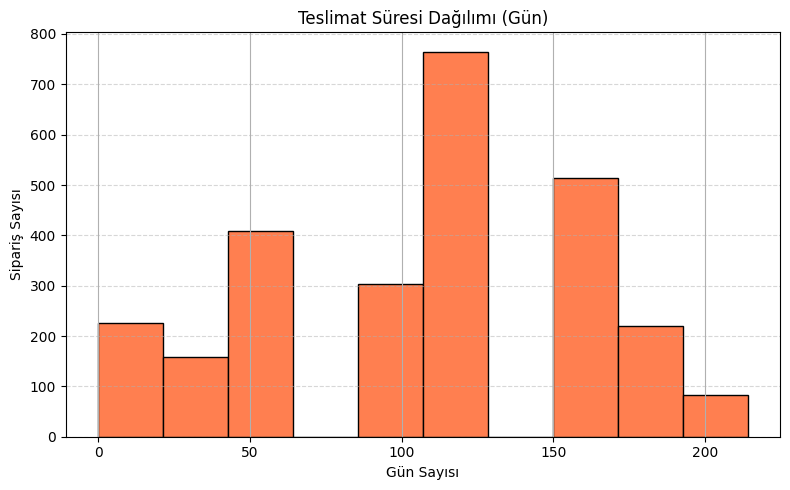

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
print(df.head())
print(df.columns)

region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='mediumseagreen')
plt.title('Bölgelere Göre Toplam Satış')
plt.xlabel('Bölge')
plt.ylabel('Toplam Satış')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8,5))
df['Delivery Days'].hist(bins=10, color='coral', edgecolor='black')
plt.title('Teslimat Süresi Dağılımı (Gün)')
plt.xlabel('Gün Sayısı')
plt.ylabel('Sipariş Sayısı')
plt.grid(True, axis='y', linestyle = '--', alpha=0.5)
plt.tight_layout()
plt.show()